In [253]:
#import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [254]:
#read csv file
df=pd.read_csv('/content/cleaned_data1.csv')
df.head(5)

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


In [255]:
#filter the data
filtered_data = df.groupby(['month', 'product', 'variant','market','platform', 'channel']).agg({
    'quantity': 'sum'
}).reset_index()

filtered_data.head()


,month,product,variant,market,platform,channel,quantity
0,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,Brick & Mortar,Retailer,167
1,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Direct,61
2,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Retailer,63
3,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,Brick & Mortar,Retailer,15
4,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,E-Commerce,Direct,10


In [256]:
#find its shape
filtered_data.shape

(215453, 7)

In [257]:
#one hot encoding for categorical columns
filtered_data = pd.get_dummies(filtered_data, columns=['product', 'variant', 'market', 'platform', 'channel'], prefix=None, dtype=int)
filtered_data.columns = filtered_data.columns.str.split('_').str[-1]

filtered_data.head()

,month,quantity,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,...,South Korea,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer
0,April,167,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,April,61,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,April,63,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,April,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,April,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [258]:
#label encoding for ordinal values
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

filtered_data['month'] = Le.fit_transform(filtered_data['month'])

In [259]:
filtered_data.head(5)

,month,quantity,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,...,South Korea,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer
0,0,167,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,61,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,63,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [260]:
# Define a function to categorize the quantity
def categorize_sales(quantity):
    if quantity <= 1000:
        return "Low sales"
    elif 1000 < quantity <= 25000:
        return "Medium sales"
    else:
        return "High sales"

# Apply the categorization function to create a new column 'sales_range'
filtered_data['sales_range'] = filtered_data['quantity'].apply(categorize_sales)

In [261]:
#drop the columns
filtered_data.drop(columns='quantity',inplace=True)

In [262]:
filtered_data.head()

,month,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,...,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,sales_range
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Low sales
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,Low sales
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,Low sales
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Low sales
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,Low sales


In [263]:
#label encoding for quantity
filtered_data['sales_range'] = Le.fit_transform(filtered_data['sales_range'])

In [264]:
filtered_data.head()

,month,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,...,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,sales_range
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [266]:
filtered_data.to_csv('/content/decision tree_prep_data.csv')

In [208]:
#Separate  X and Y
X = filtered_data.drop("sales_range", axis = 1)
y = filtered_data['sales_range']


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Training the model on the training data
tree_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = tree_model.predict(X_test)

# Evaluating the model (example using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.023995729966814417


In [251]:
training_data = pd.concat([X_train, y_train], axis=1)
training_data.head()

,month,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,...,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,sales_range
187594,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
74864,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
38600,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
24550,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
159878,8,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [252]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data.head()

,month,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,...,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,sales_range
154153,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
37657,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
53407,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,2
6049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
207169,11,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1


In [210]:
from sklearn.metrics import r2_score

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 0.6102654069834876


In [211]:
import numpy as np
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted'])
y_test_df = pd.DataFrame(np.array(y_test), columns=['Actual'])

# Concatenate the DataFrames to compare predicted and actual values side by side
comparison_df = pd.concat([y_pred_df, y_test_df], axis=1)
print(comparison_df.head(20))

    Predicted  Actual
0         2.0       2
1         1.0       1
2         2.0       2
3         1.0       1
4         1.0       1
5         1.0       1
6         1.0       1
7         1.0       1
8         1.0       1
9         1.0       1
10        1.0       1
11        2.0       2
12        1.0       1
13        1.0       1
14        1.0       1
15        1.0       1
16        1.0       1
17        1.0       1
18        2.0       1
19        1.0       1


In [212]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[    0     0     1]
 [    0 39740   511]
 [    1   515  2323]]


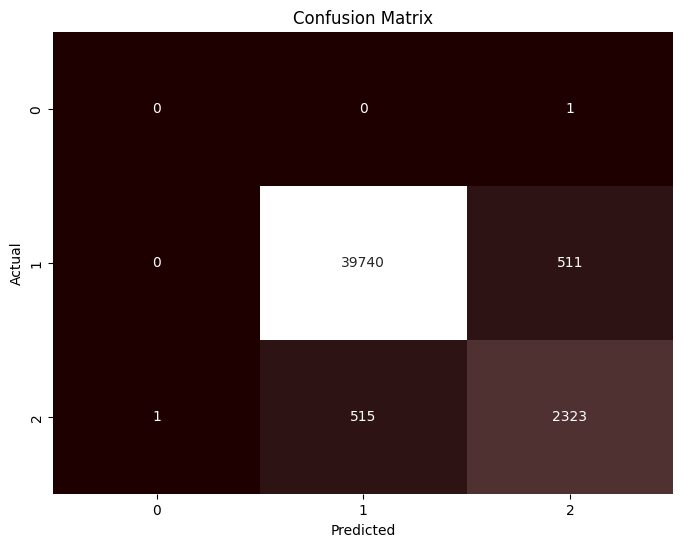

In [238]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [217]:
# Fitting the Decision Tree Classifier with a maximum depth
max_depth = 3  # Set the maximum depth
clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

[Text(0.5, 0.875, 'x[93] <= 0.5\nentropy = 0.354\nsamples = 172362\nvalue = [8, 160848, 11506]'),
 Text(0.25, 0.625, 'x[111] <= 0.5\nentropy = 0.293\nsamples = 163638\nvalue = [0, 155197, 8441]'),
 Text(0.125, 0.375, 'x[107] <= 0.5\nentropy = 0.399\nsamples = 98124\nvalue = [0, 90359, 7765]'),
 Text(0.0625, 0.125, 'entropy = 0.339\nsamples = 93127\nvalue = [0, 87267, 5860]'),
 Text(0.1875, 0.125, 'entropy = 0.959\nsamples = 4997\nvalue = [0, 3092, 1905]'),
 Text(0.375, 0.375, 'x[107] <= 0.5\nentropy = 0.083\nsamples = 65514\nvalue = [0, 64838, 676]'),
 Text(0.3125, 0.125, 'entropy = 0.048\nsamples = 61687\nvalue = [0, 61361, 326]'),
 Text(0.4375, 0.125, 'entropy = 0.441\nsamples = 3827\nvalue = [0, 3477, 350]'),
 Text(0.75, 0.625, 'x[111] <= 0.5\nentropy = 0.945\nsamples = 8724\nvalue = [8, 5651, 3065]'),
 Text(0.625, 0.375, 'x[74] <= 0.5\nentropy = 1.015\nsamples = 4996\nvalue = [8, 2523, 2465]'),
 Text(0.5625, 0.125, 'entropy = 1.016\nsamples = 4819\nvalue = [8, 2346, 2465]'),
 Text(

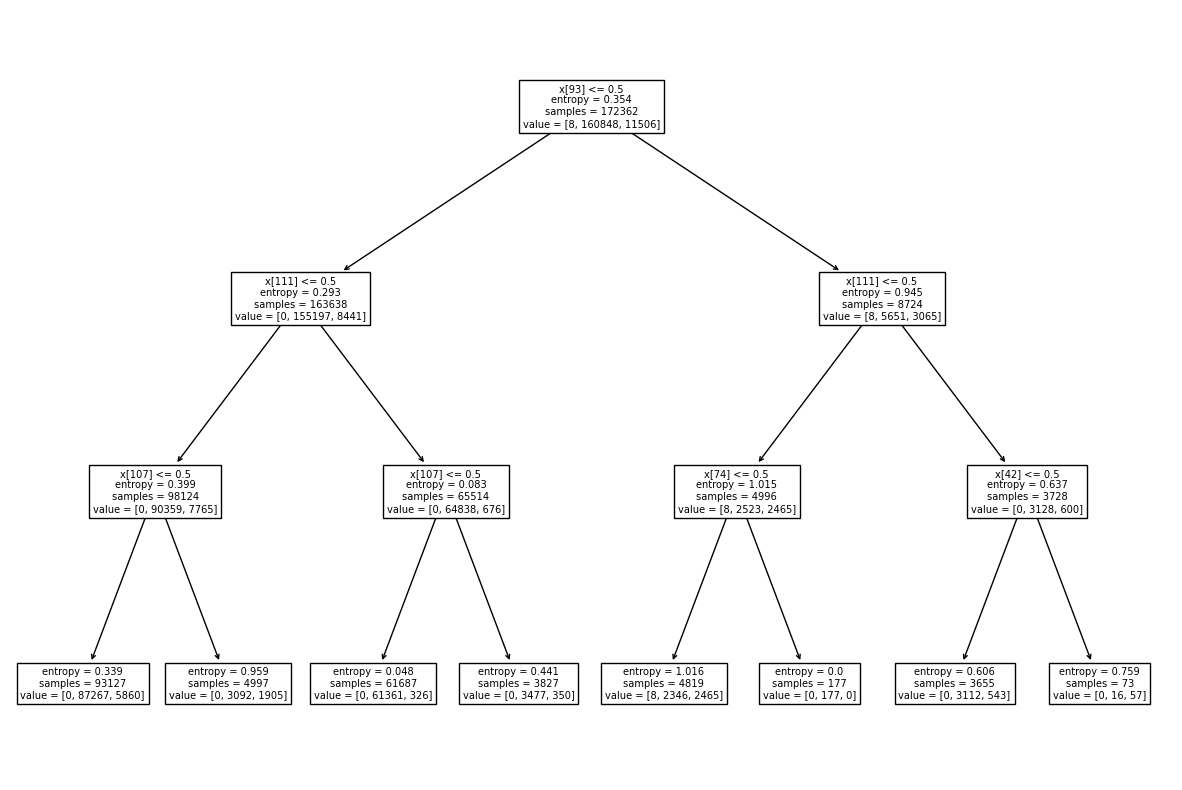

In [218]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf)

In [221]:
# Using Gini impurity as the criterion
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

[Text(0.5, 0.875, 'x[93] <= 0.5\ngini = 0.125\nsamples = 172362\nvalue = [8, 160848, 11506]'),
 Text(0.25, 0.625, 'x[112] <= 0.5\ngini = 0.098\nsamples = 163638\nvalue = [0, 155197, 8441]'),
 Text(0.125, 0.375, 'x[107] <= 0.5\ngini = 0.079\nsamples = 156785\nvalue = [0, 150358, 6427]'),
 Text(0.0625, 0.125, 'gini = 0.055\nsamples = 147961\nvalue = [0, 143789, 4172]'),
 Text(0.1875, 0.125, 'gini = 0.38\nsamples = 8824\nvalue = [0, 6569, 2255]'),
 Text(0.375, 0.375, 'x[40] <= 0.5\ngini = 0.415\nsamples = 6853\nvalue = [0, 4839, 2014]'),
 Text(0.3125, 0.125, 'gini = 0.405\nsamples = 6723\nvalue = [0, 4829, 1894]'),
 Text(0.4375, 0.125, 'gini = 0.142\nsamples = 130\nvalue = [0, 10, 120]'),
 Text(0.75, 0.625, 'x[111] <= 0.5\ngini = 0.457\nsamples = 8724\nvalue = [8, 5651, 3065]'),
 Text(0.625, 0.375, 'x[73] <= 0.5\ngini = 0.502\nsamples = 4996\nvalue = [8, 2523, 2465]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 4682\nvalue = [8, 2483, 2191]'),
 Text(0.6875, 0.125, 'gini = 0.222\nsamples 

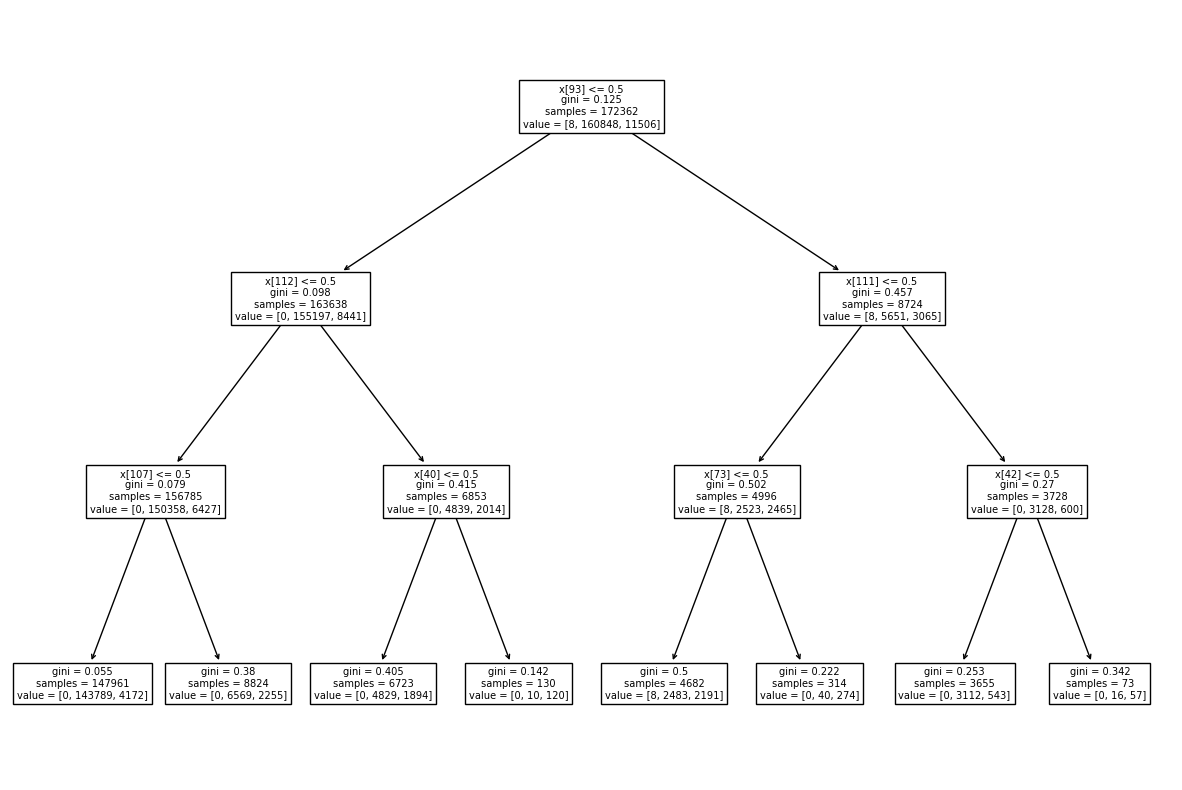

In [222]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf_gini)

In [267]:
clf_1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf_1.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.5267857142857143, 0.9, 'x[93] <= 0.5\nentropy = 0.354\nsamples = 172362\nvalue = [8, 160848, 11506]'),
 Text(0.2857142857142857, 0.7, 'x[111] <= 0.5\nentropy = 0.293\nsamples = 163638\nvalue = [0, 155197, 8441]'),
 Text(0.14285714285714285, 0.5, 'x[107] <= 0.5\nentropy = 0.399\nsamples = 98124\nvalue = [0, 90359, 7765]'),
 Text(0.07142857142857142, 0.3, 'x[113] <= 0.5\nentropy = 0.339\nsamples = 93127\nvalue = [0, 87267, 5860]'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.874\nsamples = 6853\nvalue = [0, 4839, 2014]'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.263\nsamples = 86274\nvalue = [0, 82428, 3846]'),
 Text(0.21428571428571427, 0.3, 'x[78] <= 0.5\nentropy = 0.959\nsamples = 4997\nvalue = [0, 3092, 1905]'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.936\nsamples = 4613\nvalue = [0, 2991, 1622]'),
 Text(0.25, 0.1, 'entropy = 0.831\nsamples = 384\nvalue = [0, 101, 283]'),
 Text(0.42857142857142855, 0.5, 'x[107] <= 0.5\nentropy = 0.083\nsamples = 65514\nvalue = [0, 6

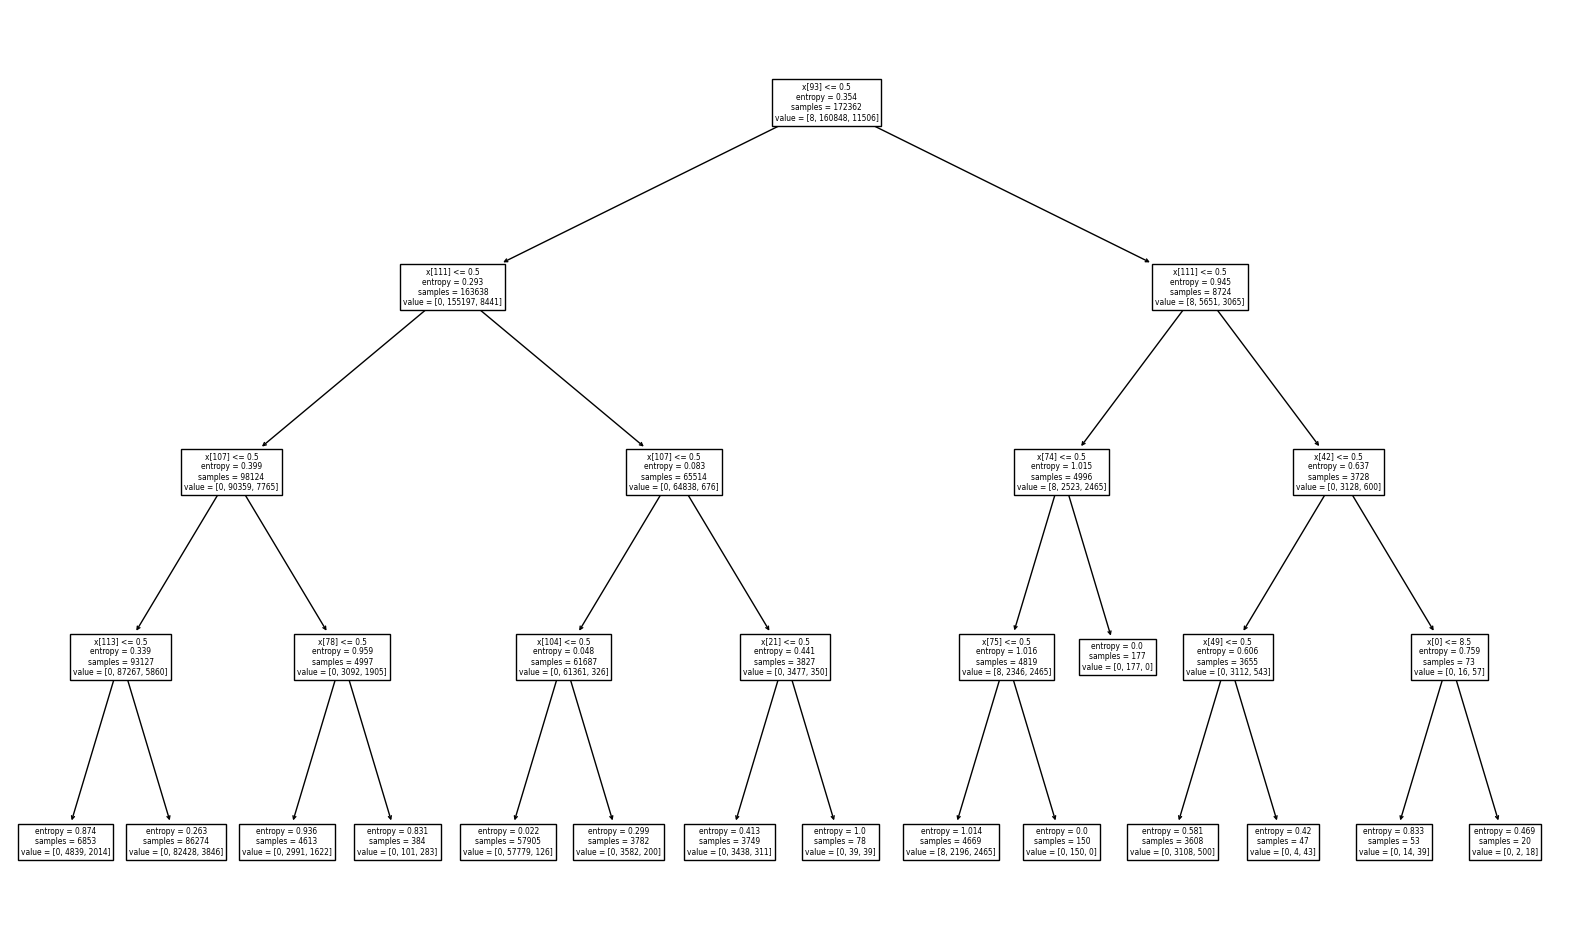

In [271]:
plt.figure(figsize=(20, 12))
tree.plot_tree(clf_1)